In [1]:
import numpy as np
np.random.seed(1337)

from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
(x_train, _), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [3]:
x_train = x_train.astype('float32') / 255. - 0.5
x_test = x_test.astype('float32') / 255. - 0.5 
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))

In [4]:
print(x_train.shape, x_test.shape)

(60000, 784) (10000, 784)


In [5]:
encoding_dim = 2

### input placeholder

In [6]:
input_img = Input(shape = (x_train.shape[1], ))

### encoder layers

In [7]:
encoded = Dense(units=128, activation='relu')(input_img)
encoded = Dense(units=64, activation='relu')(encoded)
encoded = Dense(units=10, activation='relu')(encoded)
encoder_output = Dense(units=encoding_dim)(encoded)

### decoder layers

In [8]:
decoded = Dense(units=10, activation='relu')(encoder_output)
decoded = Dense(units=64, activation='relu')(decoded)
decoded = Dense(units=128, activation='relu')(decoded)
decoded = Dense(units=x_train.shape[1], activation='tanh')(decoded)

### construct the auto-encoder model

In [11]:
auto_encoder = Model(inputs=input_img, outputs=decoded)

### construct the encoder model for plotting 

In [13]:
encoder = Model(inputs=input_img, outputs=encoder_output)

### compile auto-encoder

In [15]:
auto_encoder.compile(optimizer='adam', loss='mse')

### training & plotting

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


Epoch 1/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.0688
Epoch 2/20
60000/60000 [==============================] - 4s 68us/step - loss: 0.0567
Epoch 3/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.0524
Epoch 4/20
60000/60000 [==============================] - 3s 47us/step - loss: 0.0486
Epoch 5/20
60000/60000 [==============================] - 3s 46us/step - loss: 0.0465
Epoch 6/20
60000/60000 [==============================] - 3s 47us/step - loss: 0.0451
Epoch 7/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.0439
Epoch 8/20
60000/60000 [==============================] - 3s 47us/step - loss: 0.0431
Epoch 9/20
60000/60000 [==============================] - 3s 47us/step - loss: 0.0424
Epoch 10/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.0419
Epoch 11/20
60000/60000 [==============================] - 3s 47us/step - loss: 0.0414
Epoch 12/20
60000/60000 [===========================

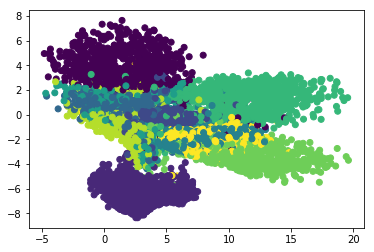

In [16]:
auto_encoder.fit(x_train, x_train,
               nb_epoch=20,
               batch_size=256,
               shuffle=True)

encoded_imgs = encoder.predict(x_test)
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c=y_test)
plt.show()